In [265]:
import pyperclip as pc
mystring = input('Enter tittle:')
dashed_str = mystring.replace(" ", "-")
link = ('<a href="#{}">{}</a>'.format(dashed_str, mystring,))
pc.copy(link)

Enter tittle:Testing the link for menu


#### <p style="text-align:right;">Jorge Castro DAPT BER</p>

# Lab 2, 3 & 4



Jump to:

- <a href="#Lab-Customer-Analysis-Round-2">Lab Customer Analysis Round 2</a>  
<br/><br/>
    - <a href="#1)-Show-the-dataframe-shape.">1) Show the dataframe shape.</a> <br/><br/>    
    - <a href="#2)-Standardize-header-names">2) Standardize header names</a>
<br/><br/>
    - <a href="#3)-Which-columns-are-numerical?">3) Which columns are numerical?</a>
<br/><br/>
    - <a href="#4)-Which-columns-are-categorical?">4) Which columns are categorical?</a>
<br/><br/>
    - <a href="#5)-Check-and-deal-with-NaN-values">5) Check and deal with NaN values</a>
<br/><br/>
    - <a href="#6)-Datetime-format.-Extract-the-months-from-the-dataset-and-store-in-a-separate-column.-Then-filter-the-data-to-show-only-the-information-for-the-first-quarter,-ie.-January,-February-and-March.-Hint:-If-data-from-March-does-not-exist,-consider-only-January-and-February.">6) Datetime format. Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter, ie. January, February and March. Hint: If data from March does not exist, consider only January and February.</a>
<br/><br/>
    - <a href="#7)-BONUS:-Put-all-the-previously-mentioned-data-transformations-into-a-function">7) BONUS: Put all the previously mentioned data transformations into a function</a> 
<br/><br/>
<br/><br/>
- <a href="#Lab-Customer-Analysis-Round-3">Lab Customer Analysis Round 3</a>
<br/><br/>
 - <a href="#1)-Show-DataFrame-info">1) Show DataFrame info</a>
<br/><br/>
 - <a href="#2)-Describe-DataFrame">2) Describe DataFrame</a>
<br/><br/>
 - <a href="#3)-Show-a-plot-of-the-total-number-of-responses">3) Show a plot of the total number of responses</a>
<br/><br/>
 - <a href="#4)-Show-a-plot-of-the-response-rate-by-the-sales-channel">4) Show a plot of the response rate by the sales channel</a>
<br/><br/>
 - <a href="#5)-Show-a-plot-of-the-response-rate-by-the-total-claim-amount">5) Show a plot of the response rate by the total claim amount</a>
<br/><br/>
 - <a href="#6)-Show-a-plot-of-the-response-rate-by-income">6) Show a plot of the response rate by income</a>
     <br/><br/>
     <br/><br/>
     
- <a href="#Lab-Customer-Analysis-Round-4">Lab Customer Analysis Round 4</a>  
<br/><br/>
    - <a href="#Check-the-data-types-of-the-columns.-Get-the-numeric-data-into-dataframe-called-numerical-and-categorical-columns-in-a-dataframe-called-categoricals.-(You-can-use-np.number-and-np.object-to-select-the-numerical-data-types-and-categorical-data-types-respectively)">Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)</a>
    <br/><br/>
    - <a href="#Now-we-will-try-to-check-the-normality-of-the-numerical-variables-visually">Now we will try to check the normality of the numerical variables visually</a>
    <br/><br/>
        - <a href="#Use-seaborn-library-to-construct-distribution-plots-for-the-numerical-variables">Use seaborn library to construct distribution plots for the numerical variables</a>
    <br/><br/>
        - <a href="#Use-Matplotlib-to-construct-histograms">Use Matplotlib to construct histograms</a>
            <br/><br/>
        - <a href="#Do-the-distributions-for-different-numerical-variables-look-like-a-normal-distribution">Do the distributions for different numerical variables look like a normal distribution</a>
            <br/><br/>
    - <a href="#For-the-numerical-variables,-check-the-multicollinearity-between-the-features.-Please-note-that-we-will-use-the-column-total_claim_amount-later-as-the-target-variable.">For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.</a>
    <br/><br/>
    - <a href="#Drop-one-of-the-two-features-that-show-a-high-correlation-between-them-(greater-than-0.9).-Write-code-for-both-the-correlation-matrix-and-for-seaborn-heatmap.-If-there-is-no-pair-of-features-that-have-a-high-correlation,-then-do-not-drop-any-features">Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features</a>



 
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

#### Lab Customer Analysis Round 2

#### 1) Show the dataframe shape.
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [185]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sweetviz as sv
%matplotlib inline

In [186]:
# Reading file into pandas as DataFrame

df = pd.read_csv('marketing_customer_analysis.csv')

In [187]:
# Showing dataframe shape

df.shape

(10910, 26)

#### 2) Standardize header names
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [188]:
# First we have a look at the first 5 rows to see what we are going to deal with
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [189]:
# We make the headers lower cases
df.columns = df.columns.str.lower()

In [190]:
df.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [191]:
# Replaceing spaces and replace them with underscores ('_') in all headers
df.columns = df.columns.str.replace(' ', '_')

In [192]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [193]:
# Dropping the column 'unnamed:_0' as it is a duplicate from the index
df = df.drop('unnamed:_0', 1)

#### 3) Which columns are numerical?
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [194]:
# To see only the colums with numeric datatypes we use the get_numeric_data method.
df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


#### 4) Which columns are categorical?
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [195]:
df.select_dtypes(include=['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### 5) Check and deal with NaN values
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [196]:
# Lets see the percentage of nulls based on the series

nulls_percent = round(df.isna().sum()/len(df)*100,2)

In [197]:
nulls_percent

customer                          0.00
state                             5.78
customer_lifetime_value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           5.80
months_since_policy_inception     0.00
number_of_open_complaints         5.80
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     5.70
vehicle_size                      5.70
vehicle_type                     50.25
dtype: float64

In [198]:
# We have to create a paralelle DataFrame but only indicating the null % of each series,
# then we use it as a guide to drop the series that have more than n% of nulls

# we save on a variable the creation of the dataframe with our calcule of null %

nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))

In [199]:
nulls_df

,0
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00
income,0.00


In [200]:

# We need to rename the headers so we can perform the column drop based on null %, 
# but first we need to reset the index as this 2 dataframes have 
# different lenghts (amount of rows)





In [201]:
# Reseting index
nulls_df = nulls_df.reset_index()

In [202]:
nulls_df.index

RangeIndex(start=0, stop=25, step=1)

In [203]:
nulls_df


,index,0
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [204]:
# Renaming headers
nulls_df.columns = ['header_name', '%_nulls']

In [205]:
nulls_df

,header_name,%_nulls
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [206]:
# saving our requirements for the drop of headers on a variable based on % nulls

columns_drop = nulls_df[nulls_df['%_nulls'] > 50 ]['header_name']

In [207]:
# Dropping columns using the variable I just saved columns_drop

df1 = df.drop(columns_drop, axis = 1)


In [208]:
df1.reset_index()

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [209]:
df1.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [210]:
# to address the rest of the null values, 
# which have a low % of nulls for each series, I will use the 
# function dropna which has a parametre called 'how' and the arguments are any or all

nulls_percent_2 = round(df1.isna().sum()/len(df1)*100,2)

In [211]:
# Lets have a look at the remaining % of nulls

nulls_percent_2

customer                         0.00
state                            5.78
customer_lifetime_value          0.00
response                         5.78
coverage                         0.00
education                        0.00
effective_to_date                0.00
employmentstatus                 0.00
gender                           0.00
income                           0.00
location_code                    0.00
marital_status                   0.00
monthly_premium_auto             0.00
months_since_last_claim          5.80
months_since_policy_inception    0.00
number_of_open_complaints        5.80
number_of_policies               0.00
policy_type                      0.00
policy                           0.00
renew_offer_type                 0.00
sales_channel                    0.00
total_claim_amount               0.00
vehicle_class                    5.70
vehicle_size                     5.70
dtype: float64

In [212]:
df2 = df1.dropna(how='any')

In [213]:
# Now we can see that we have no nulls on our datadrame
nulls_percent_3 = round(df2.isna().sum()/len(df2)*100,2)

In [214]:
nulls_percent_3

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

#### 6) Datetime format. Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter, ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [215]:
# To be able to extract the month from the date, we have to make sure that the 
# data type of the date series is actually datetime and not an string as it is in our case. 
# First we convert the series "effective_to_date" to datetime format and put it in a new series.

df2['effective_to_date_2']=pd.to_datetime(df.effective_to_date)

In [216]:
# We can see now our series "effective_to_date" has change from object to datetime64 datatype
df2.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                        object
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [217]:
df2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_2
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011-02-18
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011-01-18
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011-02-10
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011-01-11
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011-02-14


In [218]:
# Dropping the previous date column

df3 = df2.drop('effective_to_date', axis=1)

In [219]:
df3.head()

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_2
0,DK49336,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011-02-18
1,KX64629,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011-01-18
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011-02-10
3,XL78013,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011-01-11
6,IW72280,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011-02-14


In [220]:
# we extract the the month as another series:

#df3['month'] = df3['effective_to_date_2'].dt.month

#df['month'] = pd.DatetimeIndex(df['birth_date']).month

df3['month'] = pd.DatetimeIndex(df3['effective_to_date_2']).month

In [221]:
# Now we have a series called month with the month number.
#df3.head()
#df3.dtypes

In [222]:
# Converting the datatype of the new column "month" from int to datetime
#df3['month']=pd.to_datetime(df3.month)

In [223]:
# Filtering data by month (this methon only works on a datetime format series.)
df3[df3['effective_to_date_2'].dt.month == 2]

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_2,month
0,DK49336,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011-02-18,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011-02-10,2
6,IW72280,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011-02-14,2
7,IH64929,California,4956.247235,No,Basic,High School or Below,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,2011-02-24,2
14,TL59568,Arizona,12836.009510,No,Premium,High School or Below,Unemployed,M,0,Suburban,Married,116,6.0,28,0.0,2,Personal Auto,Personal L2,Offer3,Agent,835.200000,Two-Door Car,Medsize,2011-02-28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,WU60905,California,8610.667489,No,Basic,High School or Below,Unemployed,F,0,Suburban,Married,111,27.0,36,0.0,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,2011-02-06,2
10900,VN73653,Oregon,6423.739052,No,Basic,College,Unemployed,M,0,Suburban,Single,188,5.0,67,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,2011-02-13,2
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2011-02-24,2
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011-02-06,2


In [224]:
# Filtering data by month(month column)

#df_m2 = df3[df3['month'] == 2]
df_m2 = df3[df3['month'].between(1, 2)]

In [225]:
df_m2

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_2,month
0,DK49336,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011-02-18,2
1,KX64629,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011-01-18,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011-02-10,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011-01-11,1
6,IW72280,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011-02-14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,2011-01-07,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2011-02-24,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011-01-06,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011-02-06,2


#### 7) BONUS: Put all the previously mentioned data transformations into a function
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

```python
def cleaning(file.csv):
    import pandas as pd
    
    # Reading csv file
    df = pd.read_csv('marketing_customer_analysis.csv')
    
    # Lower caseing headers
    df.columns = df.columns.str.lower()
    
    # Replacing spaces by underscores
    df.columns = df.columns.str.replace(' ', '_')
    
    # Dropping the column 'unnamed:_0' as it is a duplicate from the index
    df = df.drop('unnamed:_0', 1)
    
    # Dealing with null values:
    nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', '%_nulls']
    columns_drop = nulls_df[nulls_df['%_nulls'] > 50 ]['header_name']
    df1 = df.drop(columns_drop, axis = 1)
    df1.reset_index()
    df2 = df1.dropna(how='any')
    df2['effective_to_date_2']=pd.to_datetime(df.effective_to_date)
    df3 = df2.drop('effective_to_date', axis=1)
    
    # we extract the the month as another series:
    df3['month'] = pd.DatetimeIndex(df3['effective_to_date_2']).month
    
    # converting cleaned DataFrame to csv
    df3.to_csv(cleaned_file.csv)
    return 'cleaned_file.csv'
```


### Lab Customer Analysis Round 3

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

#### 1) Show DataFrame info

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [226]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_

#### 2) Describe DataFrame

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]


In [227]:
# Pandas describe will do all the hard work for us, at least most of it.
# Calling describe on the Dataframe will produce a series of descriptive 
# statistics that allow us to get to know our data better.

# For numeric data, the result’s index will include count, mean, std, min, 
# max as well as lower, 50 and upper percentiles. By default the lower percentile 
# is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

df_describe = df3.describe()

In [228]:
df_describe

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [229]:
df3.head()

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_2,month
0,DK49336,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011-02-18,2
1,KX64629,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011-01-18,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011-02-10,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011-01-11,1
6,IW72280,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011-02-14,2


In [230]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline



#### 3) Show a plot of the total number of responses

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [231]:
df3['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

<AxesSubplot:xlabel='response', ylabel='count'>

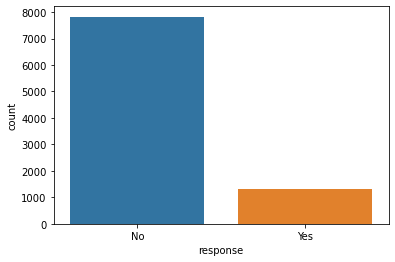

In [232]:
# df3['response'].value_counts().plot(kind='bar')

# Ploting the count of only one column
sb.countplot(x='response', data=df3)


#### 4) Show a plot of the response rate by the sales channel

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [233]:
# Response rate by the sales channel calculation


response_rate_sc = df3.groupby(['response', 'sales_channel']).size().reset_index(name='counts')





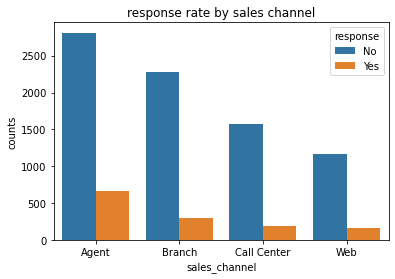

In [234]:


fig, ax = plt.subplots()

ax.set_title('response rate by sales channel')

sb.barplot(x = response_rate_sc['sales_channel'], y = response_rate_sc['counts'], hue = response_rate_sc['response'])
plt.show()


#### 5) Show a plot of the response rate by the total claim amount

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

<AxesSubplot:xlabel='sales_channel', ylabel='total_claim_amount'>

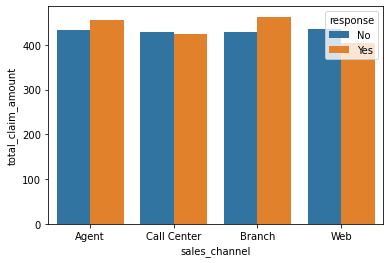

In [235]:
# Response rate by total claims amount calculation:



sb.barplot(x = 'sales_channel', y = 'total_claim_amount', hue = 'response', data = df3, ci = None )

#### 6) Show a plot of the response rate by income

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

<AxesSubplot:xlabel='sales_channel', ylabel='income'>

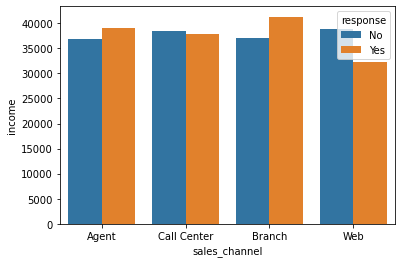

In [236]:
# sns.barplot(x="day", y="total_bill", hue="smoker", data=tips, ci=None);

sb.barplot(x = 'sales_channel', y = 'income', hue = 'response', data = df3, ci = None)


## Lab Customer Analysis Round 4
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

#### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [237]:
numerical = pd.DataFrame(df3._get_numeric_data())


In [238]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [239]:
categoricals = pd.DataFrame(df3.select_dtypes(include='object'))

In [240]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize



##### Now we will try to check the normality of the numerical variables visually


##### Use seaborn library to construct distribution plots for the numerical variables
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

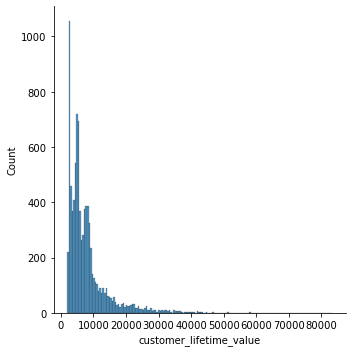

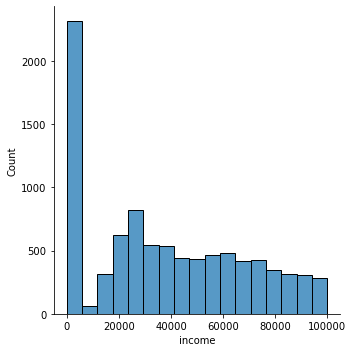

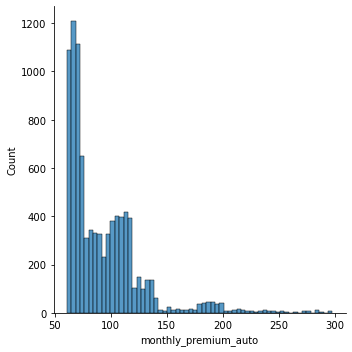

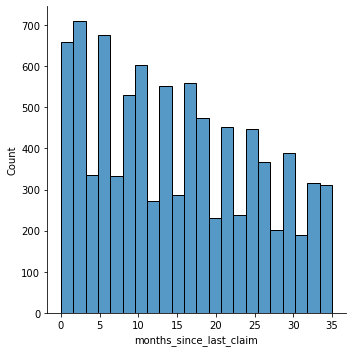

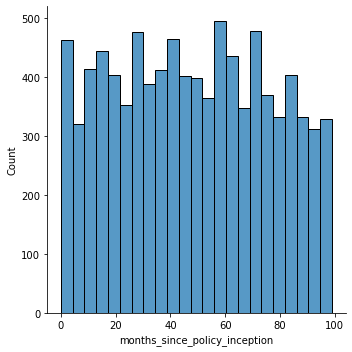

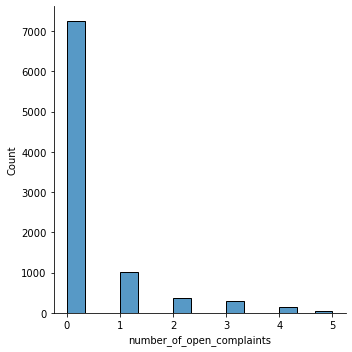

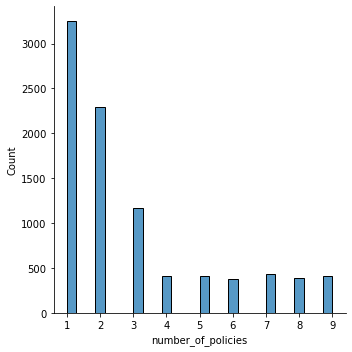

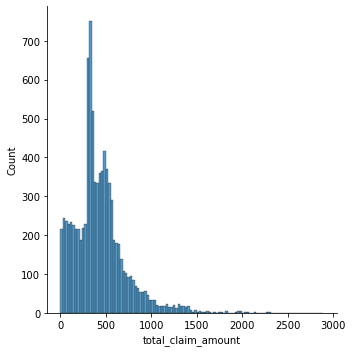

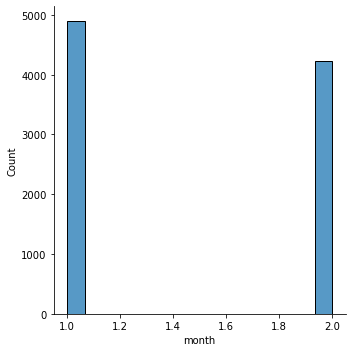

In [241]:
for i in numerical.columns:
    sb.displot(numerical[i])


#### Use Matplotlib to construct histograms
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

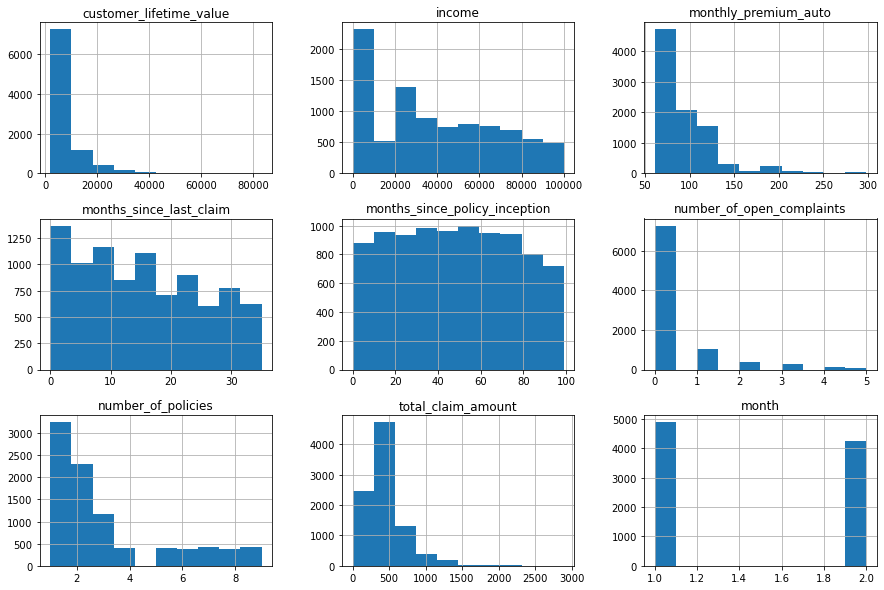

In [242]:
numerical.hist(figsize=(15, 10))

#### Do the distributions for different numerical variables look like a normal distribution
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [243]:
numerical.describe()['customer_lifetime_value']

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

<AxesSubplot:xlabel='customer_lifetime_value'>

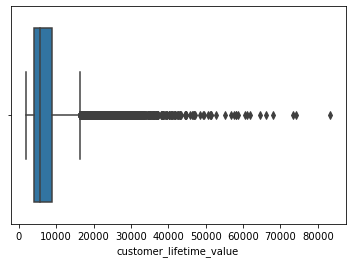

In [244]:

sb.boxplot(numerical['customer_lifetime_value'])

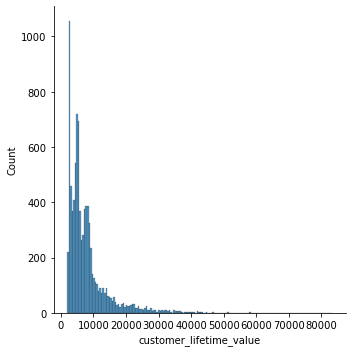

In [245]:
sb.displot(numerical['customer_lifetime_value'])

In [246]:
# Removing outliers

iqr = np.percentile(numerical['customer_lifetime_value'], 75) - np.percentile(numerical['customer_lifetime_value'], 25)
upper_limit = np.percentile(numerical['customer_lifetime_value'], 75) + 1.5*iqr
lower_limit = np.percentile(numerical['customer_lifetime_value'], 75) - 1.5*iqr

In [247]:
col_out_0 = pd.DataFrame(numerical[(numerical['customer_lifetime_value'] > lower_limit) & (numerical['customer_lifetime_value'] < upper_limit)]['customer_lifetime_value'])

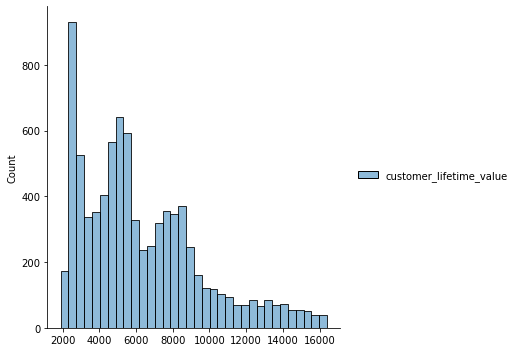

In [248]:
sb.displot(col_out_0)

In [249]:
col_out_0

,customer_lifetime_value
0,4809.216960
1,2228.525238
2,14947.917300
6,5035.035257
7,4956.247235
...,...
10901,4547.892543
10902,3579.023825
10903,2771.663013
10906,5259.444853


In [279]:
# Checking if there are any 0 values
col_out_0.isin([0]).sum(axis=0)

customer_lifetime_value    0
dtype: int64

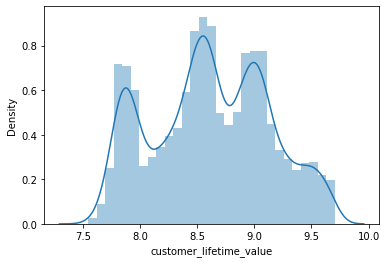

In [280]:
# Log Transformation

col_out_0['customer_lifetime_value'] = col_out_0[col_out_0['customer_lifetime_value'] > 0]
sb.distplot(np.log(col_out_0['customer_lifetime_value']))
plt.show()

In [281]:
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(col_out_0['customer_lifetime_value'])

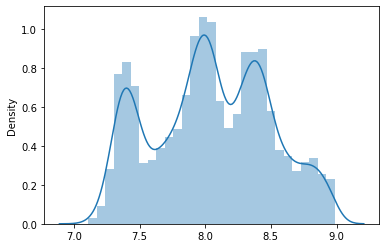

In [283]:
sb.distplot(fitted_data)
plt.show()

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [268]:
corr_data = df3.drop([], axis=1)
correlations_matrix = corr_data.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


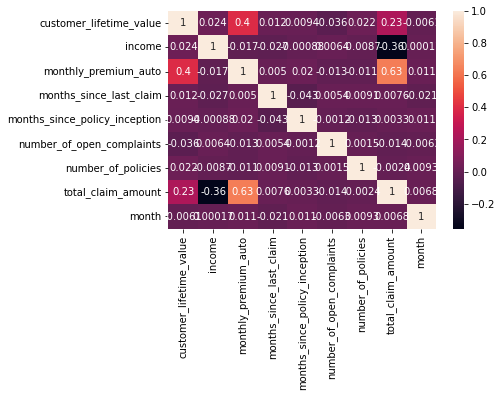

In [271]:
sb.heatmap(correlations_matrix, annot=True)
plt.show()

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
# The hiest correlation between fetures is between total_claim_amount and 
# monthly_premium_auto with 0.63

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>